In [166]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')


In [126]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [127]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text

In [128]:
###Read stocktwits data for Amazon. The ML model predicts the sentiments of messages in this dataset, for the period of 2019-07-21 to 2020-07-22

df1=pd.read_csv("AMZN_label.csv")
df1= df1.dropna(subset=['message']).reset_index()  

###Read financial corpus data. The ML model will train and test based on the data in this dataset
fin_corpus=pd.read_csv("tweet_sentiment.csv")

In [129]:

stocktwits_data = df1[['symbol', 'message', 'Date']]
stocktwits_data['Date'] = pd.to_datetime(stocktwits_data['Date'])

stocktwits_data = stocktwits_data[stocktwits_data['Date'] > '2020-03-01']

stocktwits_data = stocktwits_data[stocktwits_data['Date'] < '2020-04-01']

In [130]:
stocktwits_data.tail(5)

,symbol,message,Date
50674,AMZN,spy tsla amzn baba,2020-03-02
50675,AMZN,viruses coming mail till start uv disinfecting...,2020-03-02
50676,AMZN,amzn futures jumped 200,2020-03-02
50677,AMZN,aapl fb amzn someone pls explain relationship ...,2020-03-02
50678,AMZN,amzn better futures start rebound 30k less 20 ...,2020-03-02


In [131]:
fin_corpus.rename(columns={'cleaned_tweets': 'text', 'sentiment': 'sentiment'}, inplace=True)
fin_corpus.head(20)

,text,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1
5,david butler favorit fang stock realmoneysod a...,0
6,miss convo one favorit thinker,0
7,u intellig document nelson mandela made public,0
8,senat want emerg alert go netflix spotifi etc,1
9,hedg fund manag marc larsi say bitcoin k possibl,0


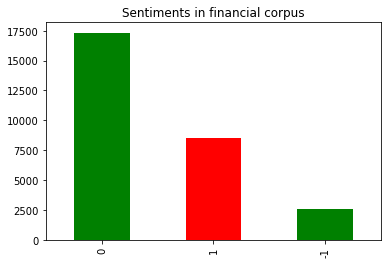

In [132]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["g","r"])
plt.title('Sentiments in financial corpus')
plt.show()

In [133]:
fin_corpus['sentiment'].value_counts()

 0    17330
 1     8512
-1     2598
Name: sentiment, dtype: int64

In [134]:
##fin_corpus.drop(fin_corpus.loc[fin_corpus['sentiment']==0].index, inplace=True)

fin_corpus["sentiment"].replace({1: "Positive"}, inplace=True)
fin_corpus["sentiment"].replace({0: "Neutral"}, inplace=True)
fin_corpus["sentiment"].replace({-1: "Negative"}, inplace=True)

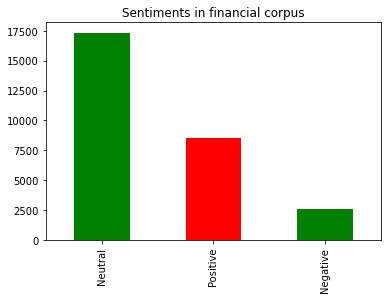

In [135]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["g","r"])
plt.title('Sentiments in financial corpus')
plt.show()

In [136]:
fin_corpus['sentiment'].value_counts()

Neutral     17330
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [137]:
train_data = fin_corpus
train_data = train_data.dropna()
train_data['sentiment'].value_counts()
##train_data["sentiment"].replace({1: 2}, inplace=True)
##train_data["sentiment"].replace({0: 1}, inplace=True)
##train_data["sentiment"].replace({-1: 0}, inplace=True)
##train_data['sentiment'].value_counts()
#train_data = train_data.sample(frac=1)
##train_data

Neutral     17324
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [138]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

#print('Before cleaning:')
#train_data['text'][0]

In [139]:
# Create a new column with the cleaned messages
train_data['text_clean'] = train_data['text'].apply(lambda string: clean_str(string))

# Display the result
train_data.head()

,text,sentiment,text_clean
0,video offic mind busi david solomon tell gs in...,Neutral,video offic mind busi david solomon tell gs in...
1,price lumber lb f sinc hit ytd high maci turna...,Neutral,price lumber lb f sinc hit ytd high maci turna...
2,say american dream dead,Negative,say american dream dead
3,barri silbert extrem optimist bitcoin predict ...,Positive,barri silbert extrem optimist bitcoin predict ...
4,satellit avoid attack space junk circl earth paid,Negative,satellit avoid attack space junk circl earth paid


In [140]:
import nltk
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
encoder = preprocessing.LabelEncoder()
from imblearn.under_sampling import RandomUnderSampler
##encoder = preprocessing.LabelEncoder()

y = train_data.sentiment
x = train_data.text_clean

In [141]:
# TFIDF feature generation for a maximum of 5000 features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_data['text_clean'])
x = tfidf_vect.transform(x)
##X_test = tfidf_vect.transform(X_test)
##xtrain_tfidf.data

In [142]:
x

<28434x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 265704 stored elements in Compressed Sparse Row format>

In [143]:
##y = train_data.sentiment
##x = train_data.text_clean

encoder.fit(y)
y = encoder.fit_transform(y)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [144]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=17324 (33.333%)
Class=0, n=17324 (33.333%)
Class=2, n=17324 (33.333%)


In [145]:
x

<51972x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 580567 stored elements in Compressed Sparse Row format>

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [147]:
##Logistic REgression using gridsearchcv

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
max_iter = [80, 100, 140]
C = np.linspace (0.1, 1.0, num = 5)
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)
lr = LogisticRegression(multi_class = "multinomial")##, solver = "lbfgs")

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5)

In [148]:
lr_model=grid.fit(X_train,y_train)

In [149]:
lr_pred=grid.predict(X_test)

0.9725829725829725
********************************************
Confusion matrix


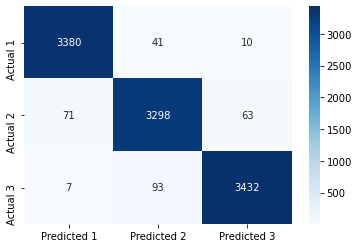

**********************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3431
           1       0.96      0.96      0.96      3432
           2       0.98      0.97      0.98      3532

    accuracy                           0.97     10395
   macro avg       0.97      0.97      0.97     10395
weighted avg       0.97      0.97      0.97     10395



In [150]:
print(metrics.accuracy_score(y_test,lr_pred))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, lr_pred)


lbl1=["Predicted 1", "Predicted 2", "Predicted 3"]##",'Predicted 4']
lbl2=["Actual 1", "Actual 2","Actual 3"]##,"Actual 4"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,lr_pred))

In [151]:
stocktwits_data.head(5)

,symbol,message,Date
38426,AMZN,amzn trumpp will youu pump pleasee,2020-03-31
38427,AMZN,amzn new article nyc orders investigation amaz...,2020-03-31
38428,AMZN,march performance review monthly profit 32 770...,2020-03-31
38429,AMZN,tsla 15k today algos leading way flawlessly to...,2020-03-31
38430,AMZN,wtrh food delivery grocery delivery company pa...,2020-03-31


In [152]:
X_to_pred_data = stocktwits_data.message

In [153]:
# TFIDF feature generation for a maximum of 5000 features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(stocktwits_data['message'])
X_to_pred = tfidf_vect.transform(X_to_pred_data)

In [154]:
##predict the sentiments for stocktwits data
stocktwits_lr_pred = grid.predict(X_to_pred)
stocktwits_data['predictedsentiment'] = encoder.inverse_transform(stocktwits_lr_pred)

In [155]:
stocktwits_data.head(20)

,symbol,message,Date,predictedsentiment
38426,AMZN,amzn trumpp will youu pump pleasee,2020-03-31,Neutral
38427,AMZN,amzn new article nyc orders investigation amaz...,2020-03-31,Neutral
38428,AMZN,march performance review monthly profit 32 770...,2020-03-31,Neutral
38429,AMZN,tsla 15k today algos leading way flawlessly to...,2020-03-31,Neutral
38430,AMZN,wtrh food delivery grocery delivery company pa...,2020-03-31,Neutral
38431,AMZN,amzn amazon investigation,2020-03-31,Neutral
38432,AMZN,amzn 1900 1880 friyay,2020-03-31,Neutral
38433,AMZN,amzn mehh,2020-03-31,Neutral
38434,AMZN,amzn 1900 1800 1700 1600 1300 100 980,2020-03-31,Positive
38435,AMZN,spy congrats bears one hell fight let 39 see g...,2020-03-31,Neutral


In [156]:
##Prepare the datasets for the calculation of the daily sentiment index
cols = ['Date', 'predictedsentiment']
df_sent_index = stocktwits_data[cols]
df_sent_index

,Date,predictedsentiment
38426,2020-03-31,Neutral
38427,2020-03-31,Neutral
38428,2020-03-31,Neutral
38429,2020-03-31,Neutral
38430,2020-03-31,Neutral
...,...,...
50674,2020-03-02,Positive
50675,2020-03-02,Neutral
50676,2020-03-02,Neutral
50677,2020-03-02,Neutral


In [157]:
df_sent_index['predictedsentiment'].value_counts()

Neutral     9458
Positive    2188
Negative     607
Name: predictedsentiment, dtype: int64

In [158]:
#write the file to a csv file
df_sent_index.to_csv('LR_send_index_to_sort.csv')

In [159]:
##find count of positive predicted sentiments for each day

df_positive_sentiments = df_sent_index[df_sent_index['predictedsentiment'] == 'Positive'].groupby('Date')['predictedsentiment'].count().reset_index()


In [160]:
df_positive_sentiments

,Date,predictedsentiment
0,2020-03-02,32
1,2020-03-03,61
2,2020-03-04,45
3,2020-03-05,54
4,2020-03-06,67
5,2020-03-07,15
6,2020-03-09,114
7,2020-03-10,63
8,2020-03-11,83
9,2020-03-12,135


In [161]:
##find count of negative predicted sentiments for each day

df_negative_sentiments = df_sent_index[df_sent_index['predictedsentiment'] == 'Negative'].groupby('Date')['predictedsentiment'].count().reset_index()


In [162]:
df_negative_sentiments

,Date,predictedsentiment
0,2020-03-02,6
1,2020-03-03,13
2,2020-03-04,12
3,2020-03-05,23
4,2020-03-06,24
5,2020-03-09,24
6,2020-03-10,22
7,2020-03-11,22
8,2020-03-12,41
9,2020-03-13,33


In [163]:
##Find count of neutral sentiments for each day

df_neutral_sentiments = df_sent_index[df_sent_index['predictedsentiment'] == 'Neutral'].groupby('Date')['predictedsentiment'].count().reset_index()


In [164]:
df_neutral_sentiments

,Date,predictedsentiment
0,2020-03-02,186
1,2020-03-03,196
2,2020-03-04,213
3,2020-03-05,255
4,2020-03-06,297
5,2020-03-07,45
6,2020-03-09,492
7,2020-03-10,289
8,2020-03-11,331
9,2020-03-12,629


In [165]:
df_positive_sentiments.rename(columns={'predictedsentiment': 'TotalPositiveIndex'}, inplace=True)
df_negative_sentiments.rename(columns={'predictedsentiment': 'TotalNegativeIndex'}, inplace=True)
df_neutral_sentiments.rename(columns={'predictedsentiment': 'TotalNeutralIndex'}, inplace=True)

In [166]:
df_combined_sentiments_1 = df_positive_sentiments.merge(df_negative_sentiments, how='outer', on='Date')
df_combined_sentiments = df_combined_sentiments_1.merge(df_neutral_sentiments, how='outer', on='Date')

df_combined_sentiments['TotalPositiveIndex'] = df_combined_sentiments['TotalPositiveIndex'].fillna(0)
df_combined_sentiments['TotalNegativeIndex'] = df_combined_sentiments['TotalNegativeIndex'].fillna(0)
df_combined_sentiments['TotalNeutralIndex'] = df_combined_sentiments['TotalNeutralIndex'].fillna(0)

df_combined_sentiments['Date'] =pd.to_datetime(df_combined_sentiments['Date'])
df_combined_sentiments = df_combined_sentiments.sort_values(by='Date')

df_combined_sentiments

,Date,TotalPositiveIndex,TotalNegativeIndex,TotalNeutralIndex
0,2020-03-02,32,6.0,186
1,2020-03-03,61,13.0,196
2,2020-03-04,45,12.0,213
3,2020-03-05,54,23.0,255
4,2020-03-06,67,24.0,297
5,2020-03-07,15,0.0,45
6,2020-03-09,114,24.0,492
7,2020-03-10,63,22.0,289
8,2020-03-11,83,22.0,331
9,2020-03-12,135,41.0,629


In [167]:
##Find daily sentiment index 
##formula - daily sentiment index = (number of positive sentiments - number of negative sentiments) / total number of messages
##import math
##df_combined_sentiments['total'] =  df_combined_sentiments['TotalPositiveIndex'] + df_combined_sentiments['TotalNegativeIndex'] + df_combined_sentiments['TotalNeutralIndex']
##df_combined_sentiments['SentimentIndex'] = (df_combined_sentiments['TotalPositiveIndex'] - df_combined_sentiments['TotalNegativeIndex'])/(df_combined_sentiments['total'])
##df_combined_sentiments['SentimentIndex'] = df_combined_sentiments['SentimentIndex'] * 100
##df_combined_sentiments

In [168]:
##Find daily sentiment index
import math
df_combined_sentiments['pre_index'] = (1 + df_combined_sentiments['TotalPositiveIndex'])/(1 + df_combined_sentiments['TotalNegativeIndex'])
#df_combined_sentiments['pre_index'].apply(lambda x: float(x))
df_combined_sentiments['sent_index'] = np.log(df_combined_sentiments['pre_index'])
df_combined_sentiments

,Date,TotalPositiveIndex,TotalNegativeIndex,TotalNeutralIndex,pre_index,sent_index
0,2020-03-02,32,6.0,186,4.714286,1.550597
1,2020-03-03,61,13.0,196,4.428571,1.488077
2,2020-03-04,45,12.0,213,3.538462,1.263692
3,2020-03-05,54,23.0,255,2.291667,0.829279
4,2020-03-06,67,24.0,297,2.720000,1.000632
5,2020-03-07,15,0.0,45,16.000000,2.772589
6,2020-03-09,114,24.0,492,4.600000,1.526056
7,2020-03-10,63,22.0,289,2.782609,1.023389
8,2020-03-11,83,22.0,331,3.652174,1.295323
9,2020-03-12,135,41.0,629,3.238095,1.174985


In [169]:
df_combined_sentiments.to_csv('LR_final_sentiments.csv')

In [170]:
# For reading stock data from yahoo - need to pip install pandas_datareader
from pandas_datareader.data import DataReader

# Get the stock data for Amazon in df - to predict the closing price

df = DataReader('AMZN', data_source='yahoo', start='2020-03-02', end='2020-03-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951
2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990
2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956
2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029
2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966
2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985
2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946
2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985
2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985


In [171]:
##calculate the daily stockprice change using formula price change = (close price - open price)/open price
df['pricechange'] = (df['Close'] - df['Open'])/df['Open']
df['pricechange'] = df['pricechange'] * 100
df

,High,Low,Open,Close,Volume,Adj Close,pricechange
Date,,,,,,,
2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951,2.489389
2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990,-3.360383
2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956,1.503157
2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029,-0.464044
2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966,1.391465
2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985,1.508011
2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946,1.119256
2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985,-1.991011
2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985,-2.634757


In [172]:
new_df = df.reset_index()
new_df['positivepriceindex']=np.where(new_df.pricechange>0.5, 1,new_df.pricechange)
new_df['pricebuffer']=np.where((new_df.positivepriceindex < 0.5) & (new_df.positivepriceindex > (-0.5)),0 ,new_df.positivepriceindex)
new_df['priceindex']=np.where(new_df.pricebuffer < (-0.5),-1,new_df.pricebuffer)


In [173]:

new_df
#new_df['Date'] = pd.to_datetime(df['Date'])
##print("Start date is: ", new_df['Date'].min())
##rint("End date is: ", new_df['Date'].max())

,Date,High,Low,Open,Close,Volume,Adj Close,pricechange,positivepriceindex,pricebuffer,priceindex
0,2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951,2.489389,1.000000,1.000000,1.0
1,2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990,-3.360383,-3.360383,-3.360383,-1.0
2,2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956,1.503157,1.000000,1.000000,1.0
3,2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029,-0.464044,-0.464044,0.000000,0.0
4,2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966,1.391465,1.000000,1.000000,1.0
5,2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985,1.508011,1.000000,1.000000,1.0
6,2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946,1.119256,1.000000,1.000000,1.0
7,2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985,-1.991011,-1.991011,-1.991011,-1.0
8,2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985,-2.634757,-2.634757,-2.634757,-1.0
9,2020-03-13,1786.310059,1680.619995,1755.000000,1785.000000,8809700,1785.000000,1.709402,1.000000,1.000000,1.0


In [174]:
new_df

,Date,High,Low,Open,Close,Volume,Adj Close,pricechange,positivepriceindex,pricebuffer,priceindex
0,2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951,2.489389,1.000000,1.000000,1.0
1,2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990,-3.360383,-3.360383,-3.360383,-1.0
2,2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956,1.503157,1.000000,1.000000,1.0
3,2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029,-0.464044,-0.464044,0.000000,0.0
4,2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966,1.391465,1.000000,1.000000,1.0
5,2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985,1.508011,1.000000,1.000000,1.0
6,2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946,1.119256,1.000000,1.000000,1.0
7,2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985,-1.991011,-1.991011,-1.991011,-1.0
8,2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985,-2.634757,-2.634757,-2.634757,-1.0
9,2020-03-13,1786.310059,1680.619995,1755.000000,1785.000000,8809700,1785.000000,1.709402,1.000000,1.000000,1.0


In [175]:
#new_df = df.reset_index()
###Join the dataset having sentiment index with the stock price dataset generated above
new_df = new_df.merge(df_combined_sentiments, how='left', on='Date')
new_df

,Date,High,Low,Open,Close,Volume,Adj Close,pricechange,positivepriceindex,pricebuffer,priceindex,TotalPositiveIndex,TotalNegativeIndex,TotalNeutralIndex,pre_index,sent_index
0,2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951,2.489389,1.000000,1.000000,1.0,32,6.0,186,4.714286,1.550597
1,2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990,-3.360383,-3.360383,-3.360383,-1.0,61,13.0,196,4.428571,1.488077
2,2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956,1.503157,1.000000,1.000000,1.0,45,12.0,213,3.538462,1.263692
3,2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029,-0.464044,-0.464044,0.000000,0.0,54,23.0,255,2.291667,0.829279
4,2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966,1.391465,1.000000,1.000000,1.0,67,24.0,297,2.720000,1.000632
5,2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985,1.508011,1.000000,1.000000,1.0,114,24.0,492,4.600000,1.526056
6,2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946,1.119256,1.000000,1.000000,1.0,63,22.0,289,2.782609,1.023389
7,2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985,-1.991011,-1.991011,-1.991011,-1.0,83,22.0,331,3.652174,1.295323
8,2020-03-12,1765.000000,1675.000000,1721.979980,1676.609985,11346200,1676.609985,-2.634757,-2.634757,-2.634757,-1.0,135,41.0,629,3.238095,1.174985
9,2020-03-13,1786.310059,1680.619995,1755.000000,1785.000000,8809700,1785.000000,1.709402,1.000000,1.000000,1.0,164,33.0,627,4.852941,1.579585


In [176]:
cols = ['Date', 'priceindex', 'sent_index']
df_correlation_analysis_test = new_df[cols]
#df_correlation_analysis_test1 = df_correlation_analysis_test
df_correlation_analysis_test = df_correlation_analysis_test.set_index('Date')
df_correlation_analysis_test

,priceindex,sent_index
Date,,
2020-03-02,1.0,1.550597
2020-03-03,-1.0,1.488077
2020-03-04,1.0,1.263692
2020-03-05,0.0,0.829279
2020-03-06,1.0,1.000632
2020-03-09,1.0,1.526056
2020-03-10,1.0,1.023389
2020-03-11,-1.0,1.295323
2020-03-12,-1.0,1.174985


In [178]:
pearsoncorr = df_correlation_analysis_test.corr(method='pearson')
pearsoncorr

,priceindex,sent_index
priceindex,1.000000,0.149156
sent_index,0.149156,1.000000


In [179]:
corr = df_correlation_analysis_test.priceindex.rolling(4).corr(df_correlation_analysis_test.sent_index)
corr

Date
2020-03-02         NaN
2020-03-03         NaN
2020-03-04         NaN
2020-03-05    0.046166
2020-03-06   -0.443196
2020-03-09    0.711332
2020-03-10    0.589641
2020-03-11   -0.224935
2020-03-12    0.107635
2020-03-13    0.162652
2020-03-16    0.678573
2020-03-17    0.331998
2020-03-18         NaN
2020-03-19         NaN
2020-03-20    0.216495
2020-03-23    0.813836
2020-03-24    0.891739
2020-03-25    0.971174
2020-03-26    0.762699
2020-03-27   -0.154962
2020-03-30   -0.629551
2020-03-31   -0.096397
dtype: float64

In [180]:
corr = corr.reset_index()
corr.rename( columns={0 :'Correlation'}, inplace=True )
corr

,Date,Correlation
0,2020-03-02,NaN
1,2020-03-03,NaN
2,2020-03-04,NaN
3,2020-03-05,0.046166
4,2020-03-06,-0.443196
5,2020-03-09,0.711332
6,2020-03-10,0.589641
7,2020-03-11,-0.224935
8,2020-03-12,0.107635
9,2020-03-13,0.162652


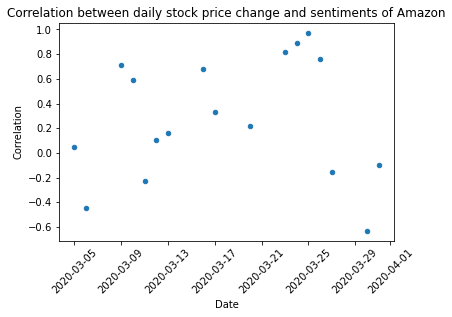

In [195]:
corr.plot.scatter(x='Date', y='Correlation', title= "Correlation between daily stock price change and sentiments of Amazon")
plt.xticks(rotation=45)

plt.show(block=True)


In [182]:
corr['Category']=np.where(corr.Correlation>0,'>0', '<0')
##df_correlation_analysis_test['sentindex']=np.where(df_correlation_analysis_test.positivesentindex<0,-1,df_correlation_analysis_test.positivesentindex)
corr

,Date,Correlation,Category
0,2020-03-02,NaN,<0
1,2020-03-03,NaN,<0
2,2020-03-04,NaN,<0
3,2020-03-05,0.046166,>0
4,2020-03-06,-0.443196,<0
5,2020-03-09,0.711332,>0
6,2020-03-10,0.589641,>0
7,2020-03-11,-0.224935,<0
8,2020-03-12,0.107635,>0
9,2020-03-13,0.162652,>0


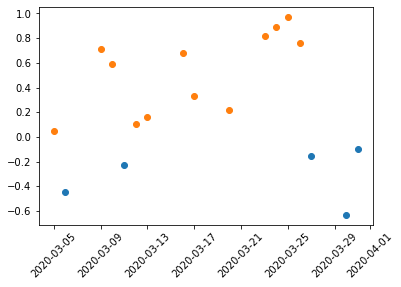

In [193]:
groups = corr.groupby("Category")
for name, group in groups:
   ## plt.plot(group["Date"], group["Correlation"], marker="o", linestyle="", label=name)
    plt.plot(group["Date"], group["Correlation"], marker="o", linestyle="", label=name)
#plt.plot(x='Date', y='Correlation', title= "Correlation between Daily Stock price change and Daily Sentiments of Amazon")
plt.xticks(rotation=45)
plt.show(block = True)
#plt.show(block = None)#, x='Date', y='Correlation', title= "Correlation between Daily Stock price change and Daily Sentiments of Amazon")
#groups
##corr.head(20)

In [187]:
corr["Correlation"].mean()

0.27852343486021675